## Central Limit Theorem (CLT)

The Central Limit Theorem states that if we repeatedly take samples for a population with replacement, as the number of samples taken increases:

1. The mean of the sample means will approach equal to the mean of the population, independent of sample size.
2. The standard deviation of the sample mean will approach equal to the population mean divided by the square root of the sample size.
3. If the population is normal, then the sample means will have a normal distribution independent of sample size.
4. If the population is not normally distributed but the sample size is greater than or equal to 30 then the sampling distribution of the sample means approximates a normal distribution.

Both statements 1 and 2 assume you have chosen every possible sample from the population or essentially you have chosen enough samples to approach the above equations being true. These equations are useful when inferring parameters about the population given parameters calculated from the samples.

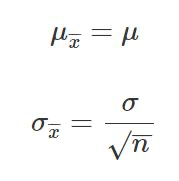

where,

- $μ_x$ = Sample mean
- μ = Population mean
- n = Sample size

The standard deviation of the sample mean will approach equal to the population mean divided by the square root of the sample size.

In order to better understand statements 3 and 4 we will begin our code along with the Jupyter Notebook!

First we need to import our standard libraries. You should be familiar with each library and its use. If not, please see previous corresponding lessons.

In [1]:
# Importing standard libraries

import numpy as np # used for random number generator
from scipy.stats import norm # extension of numpy for stat analysis
from scipy.stats import gamma # extension of numpy for stat analysis
import pandas as pd # used for data manipulation
import matplotlib.pyplot as plt #used for quick plotting
import seaborn as sns # used to plot distributions
import warnings #used to ignore displot warning
import random 

warnings.filterwarnings('ignore')

Now that we have imported the necessary libraries, let’s get started on working through Statement 3 of the Central Limit Theorem. Statement 3 states that:

If the population is normal, then the sample means will have a normal distribution independent of sample size.

To test this we are going to use Jupyter Notebook to generate random samples from a normal distribution for various sample sizes. The goal is to see if the distribution for each sample size will remain normal as stated in CTL Statement 3.

Let’s assume our data is normally distributed and gives us the number of students per classroom across California with a population mean of μ = 15 and standard deviation of 𝝈 = 2. To determine if CLT Statement 3 holds, we are then going to take sample sizes of 5, 10, 100, and 250. With each of the sample sizes, we will take 20,000 total samples and calculate the sample mean x for each. We will then plot these sample means in a distribution plot.

The first step is to define an array of size 20,000 for each sample size and assign values to our population distribution parameters, mu (μ) and sigma(𝝈).

In [2]:
#Define an array for 20,000 samples per each sample size
samples_5 = np.zeros(20000)
samples_10 = np.zeros(20000)
samples_100 = np.zeros(20000)
samples_250 = np.zeros(20000)

#Defining parameters from our population distribution
mu, sigma = 15, 2

The next step is to create a for loop for each sample size that will output random values from a normal distribution and then calculate each sample mean.

In [3]:
#Defining parameters from our population distribution
mu, sigma = 15, 2

#Creating for loop for sample size 5
for a in range(20000):
    sample = np.random.normal(mu, sigma, 5)
    x_bar_5 = sample.mean()
    samples_5[a] = x_bar_5

#Creating for loop for sample size 10
for b in range(20000):
    sample = np.random.normal(mu, sigma, 10)
    x_bar_10 = sample.mean()
    samples_10[b] = x_bar_10

#Creating for loop for sample size 100
for c in range(20000):
    sample = np.random.normal(mu, sigma, 100)
    x_bar_100 = sample.mean()
    samples_100[c] = x_bar_100

#Creating for loop for sample size 250
for d in range(20000):
    sample = np.random.normal(mu, sigma, 250)
    x_bar_250 = sample.mean()
    samples_250[d] = x_bar_250

Now that we have an array for each sample size. Let’s combine them into a pandas dataframe for plotting each distribution on the same plot. Then let’s plot the dataframe and compare the distributions.

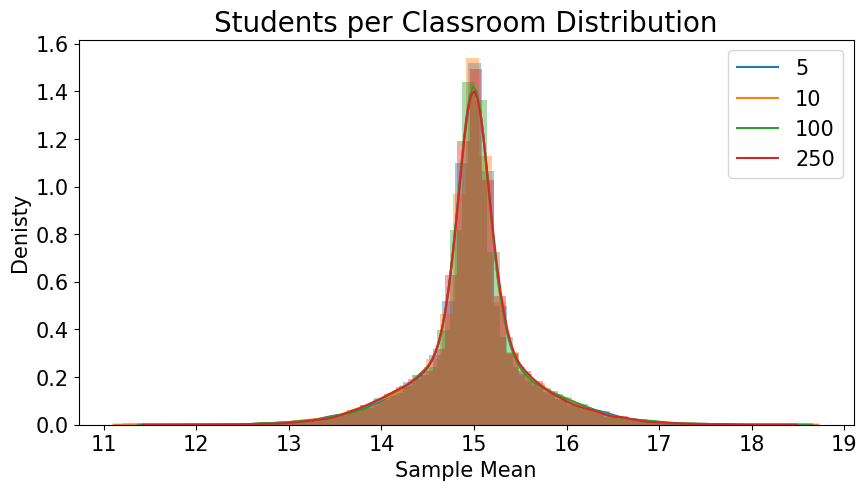

In [5]:

array = np.vstack((samples_5,samples_10,
                             samples_100,samples_250)).reshape(20000, 4)

#Combining arrays into a dataframe to plot
df = pd.DataFrame(array)
df.columns = ['5','10','100','250']

#Plotting Distributions
plt.figure(figsize=(10,5))
sns.distplot(df['5'])
sns.distplot(df['10'])
sns.distplot(df['100'])
sns.distplot(df['250'])
plt.title('Students per Classroom Distribution', fontsize=20)
plt.xlabel('Sample Mean', fontsize=15)
plt.ylabel('Denisty', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(df, fontsize=15)
plt.show()

CLT Statement 3 holds! We can see within the plot all distributions regardless of sample size are normally distributed. We can also see that as we increase the sample size our sample mean approaches that of the population mean, from CLT Statement 1.

## Example

In [ ]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
# Initialize pygame
pygame.init()

# Set up the display
width, height = 1200, 400
window = pygame.display.set_mode((width, height))
pygame.display.set_caption("Multi-Armed Bandit Visualization")

# Set colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)

# Set up fonts
font = pygame.font.Font(None, 36)

# Set up the bandit environment
n_arms = 4
arm_specifics = [(5, 0.1), (3, 1.5), (2, 0.5), (1, 0.1)]  # MEan & Variance
np.random.shuffle(arm_specifics)
estimated_rewards = np.zeros(n_arms)  # Estimated rewards
counts = np.zeros(n_arms)  # Number of times each arm is played
cumulative_regret = []  # To track cumulative regret
mean_reward = np.zeros(n_arms)
var_reward = np.zeros(n_arms)
# Arm positions and sizes
arm_width, arm_height = 100, 100
arm_spacing = 300
arm_x_positions = [20 + i * arm_spacing for i in range(n_arms)]
arm_y_position = 100

# Run the game loop
running = True
clock = pygame.time.Clock()

while running:
    window.fill(WHITE)

    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        if event.type == pygame.MOUSEBUTTONDOWN:
            mouse_x, mouse_y = event.pos
            for i, x in enumerate(arm_x_positions):
                if x < mouse_x < x + arm_width and arm_y_position < mouse_y < arm_y_position + arm_height:
                    # Simulate pulling the arm i

                    reward = np.random.normal(
                        arm_specifics[i][0], arm_specifics[i][1])
                    reward_Max = np.random.normal(
                        arm_specifics[int(np.argmax(arm_specifics)/2)][0], arm_specifics[int(np.argmax(arm_specifics)/2)][1])

                    # can reget be below the zero
                    # reward = np.mean(np.random.normal(
                    #     arm_specifics[i][0], arm_specifics[i][1],100))
                    # reward_Max = np.mean(np.random.normal(
                    #     arm_specifics[int(np.argmax(arm_specifics)/2)][0], arm_specifics[int(np.argmax(arm_specifics)/2)][1],100))

                    counts[i] += 1
                    mean_reward[i] = mean_reward[i] * \
                        (counts[i]-1)/counts[i] + reward/counts[i]
                    var_reward[i] = var_reward[i] * \
                        ((counts[i]-1)/counts[i])**2 + \
                        ((reward - mean_reward[i])/counts[i])**2
                    # Update cumulative regret
                    cumulative_regret.append(reward_Max - reward)

    # Drawing slot machines (arms)
    for i, x in enumerate(arm_x_positions):
        pygame.draw.rect(
            window, BLUE, (x, arm_y_position, arm_width, arm_height))
        reward_text = font.render(
            f"Reward Mean: {mean_reward[i]:.2f}", True, BLACK)
        window.blit(reward_text, (x, arm_y_position + arm_height + 10))
        variance_text = font.render(
            f"Reward std: {np.sqrt(var_reward[i]):.2f}", True, BLACK)
        window.blit(variance_text, (x, arm_y_position + arm_height + 30))
        count_text = font.render(f"Count: {int(counts[i])}", True, BLACK)
        window.blit(count_text, (x, arm_y_position + arm_height + 60))

    # Display cumulative regret
    regret_text = font.render(f"Cumulative Regret: {
                              sum(cumulative_regret):.2f}", True, RED)
    window.blit(regret_text, (50, 20))

    # Update the display
    pygame.display.flip()

    # Cap the frame rate
    clock.tick(30)

pygame.quit()
Sum_cumulative_regret = []
for i in range(len(cumulative_regret)):
    Sum_cumulative_regret.append(sum(cumulative_regret[0:i]))
fig, ax = plt.subplots()
ax.plot(Sum_cumulative_regret, label="Regret")
ax.set_title("")
ax.set_xlabel("Trial")
ax.set_ylabel("Regret")

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Visualize the uncertainty in our estimate of regret

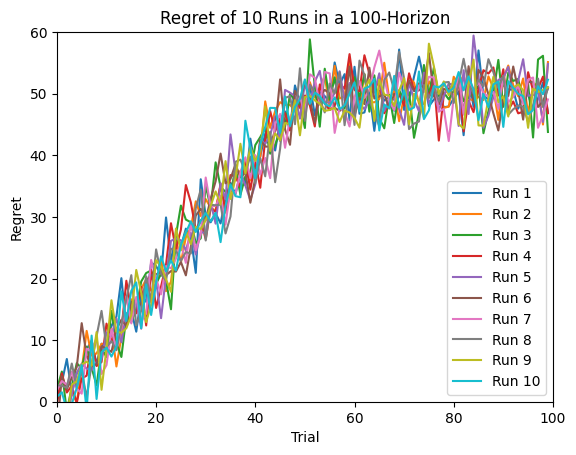

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

horizon = 100
runs_no= 10

std = 3

# Create a function to plot the regret of a single run
def plot_regret(regret, label):
    plt.plot(regret, label=label)

# Generate runs_no random regret sequences
regret_sequences = []
for i in range(runs_no):

  for i in range(horizon):
    x1 = np.arange(horizon/ 2)+ np.random.normal(0, std, int(horizon/2))
    x2 =  np.random.normal(50, std, int(horizon/2))
    regret = np.append(x1 , x2)

    regret_sequences.append(regret)

# Plot each regret sequence separately
fig, ax = plt.subplots()
for i in range(runs_no):
    plot_regret(regret_sequences[i], f"Run {i + 1}")

# Set the title and labels
ax.set_title("Regret of 10 Runs in a 100-Horizon")
ax.set_xlabel("Trial")
ax.set_ylabel("Regret")
plt.xlim([0,horizon])
plt.ylim([0,60])
# Show the plot
plt.legend()
plt.show()


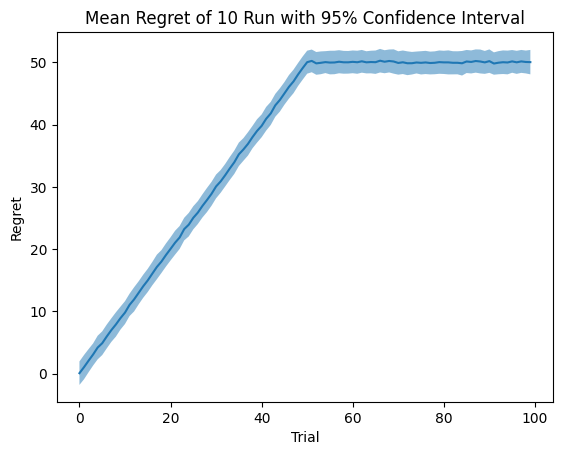

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of the regret sequences
mean_regret = np.mean(regret_sequences, axis=0)
std_regret = np.std(regret_sequences, axis=0)

# Calculate the confidence interval for the mean regret
upper_bound = mean_regret + 1.96 * std_regret / np.sqrt(runs_no)
lower_bound = mean_regret - 1.96 * std_regret / np.sqrt(runs_no)

# Plot the mean regret and confidence interval
fig, ax = plt.subplots()
ax.plot(mean_regret, label="Mean Regret")
ax.fill_between(np.arange(len(mean_regret)), lower_bound ,upper_bound , alpha=0.5, label="Confidence Interval")

# Set the title and labels
ax.set_title("Mean Regret of 10 Run with 95% Confidence Interval")
ax.set_xlabel("Trial")
ax.set_ylabel("Regret")

# Show the plot
plt.show()


## Task

### Rewards

In [8]:
import numpy as np
def create_reward_function(num_actions, means, variances):

    if len(means) != num_actions or len(variances) != num_actions:

        raise ValueError("Length of means and variances should be equal to num_actions.")


    def reward_function(action):

        action -= 1

        if action < 0 or action >= num_actions:

            raise ValueError("Invalid action index.")

        mean, std = means[action], np.sqrt(variances[action])
        reward = np.random.normal(mean, std)
        
        return reward

    return reward_function


num_actions = 3

means = [1.0, 2.0, 5.0]

variances = [0.1, 1, 0.1]


bandit_reward_function = create_reward_function(num_actions, means, variances)


action = 2

reward = bandit_reward_function(action)

print(f"Action {action} -> Reward: {reward}")

Action 2 -> Reward: 4.048785689818459


### Policy

In [9]:
def random_bandit_policy(num_actions):
    action = random.choice(list(range(1, num_actions)))
    return action

def epsilon_greedy_policy(q_values, epsilon):
    if np.random.rand() < epsilon:
        action = np.random.randint(1, len(q_values))
    else:
        action = np.argmax(q_values) + 1
    return action

In [14]:
def run(num_steps, num_actions, means, variances, reward_function, policy, epsilon=None):

    rewards = []
    regret = []
    q_values = np.zeros(num_actions)  # Estimated Q-values (initialized to 0)
    action_rewards = [[] for _ in range(num_actions)] # to keep the exact rewards

    for step in range(num_steps):
        match policy:
            case "random bandit policy":
                action = random_bandit_policy(num_actions)

            case "epsilon greedy policy":
                if epsilon is None:
                    epsilon = 1 # it means random policy
                    
                action = epsilon_greedy_policy(q_values, epsilon)


        # Get the reward for the selected action
        reward = reward_function(action)
        rewards.append(reward)

        # Update Q-values and counter of action 
        action_rewards[action - 1].append(reward)
        q_values[action - 1] = np.mean(action_rewards[action - 1])

        best_action = np.argmax(means)  # Action with the highest mean reward
        optimal_reward = reward_function(best_action) 
        regret.append(optimal_reward - reward) 

        # finish code
    return rewards, regret

In [15]:
def cumulative_reward(X):
    sum_X = []
    for i in range(len(X)):
        sum_X.append(sum(X[0:i]))
    return sum_X

### Run

In [17]:
# Example
num_steps = 1000
num_actions = 3
means = [1.0, 2.0, 5.0]
variances = [0.1, 1, 0.1]
bandit_reward_function = create_reward_function(num_actions, means, variances)

# Run with random bandit policy
random_reward,regret_random= run(num_steps, num_actions, means, variances,
                     bandit_reward_function, "random bandit policy")

random_rewards = cumulative_reward(random_reward)

epsilon_greedy_reward_05, regret_eg_05 = run(num_steps, num_actions, means, variances,
                             bandit_reward_function, "epsilon greedy policy", epsilon=0.5)
epsilon_greedy_rewards_05 = cumulative_reward(epsilon_greedy_reward_05)

epsilon_greedy_reward_01,regret_eg_01 = run(num_steps, num_actions, means, variances,
                             bandit_reward_function, "epsilon greedy policy", epsilon=0.1)
epsilon_greedy_rewards_01 = cumulative_reward(epsilon_greedy_reward_01)

### Plots

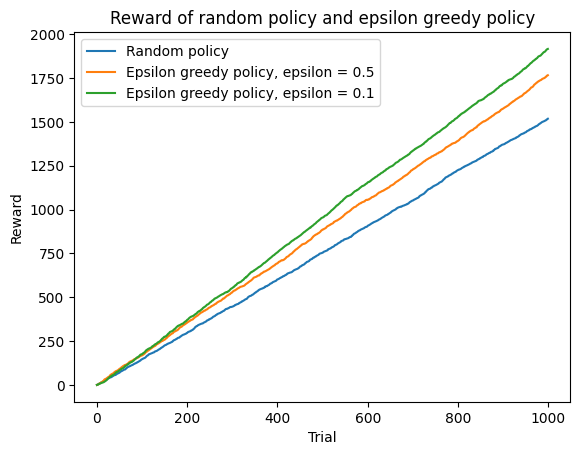

In [13]:
import matplotlib.pyplot as plt
# TO DO
fig, ax = plt.subplots()

ax.plot(random_rewards, label="Random policy")
ax.plot(epsilon_greedy_rewards_05, label="Epsilon greedy policy, epsilon = 0.5")
ax.plot(epsilon_greedy_rewards_01, label="Epsilon greedy policy, epsilon = 0.1")
# Set the title and labels
ax.set_title("Reward of random policy and epsilon greedy policy")
ax.set_xlabel("Trial")
ax.set_ylabel("Reward")
# Show the plot
plt.legend()
plt.show()

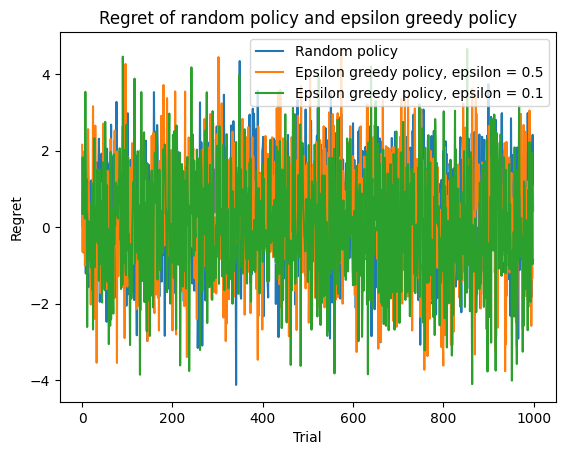

In [18]:
import matplotlib.pyplot as plt
# TO DO
fig, ax = plt.subplots()

ax.plot(regret_random, label="Random policy")
ax.plot(regret_eg_05, label="Epsilon greedy policy, epsilon = 0.5")
ax.plot(regret_eg_01, label="Epsilon greedy policy, epsilon = 0.1")
# Set the title and labels
ax.set_title("Regret of random policy and epsilon greedy policy")
ax.set_xlabel("Trial")
ax.set_ylabel("Regret")
# Show the plot
plt.legend()
plt.show()

## Example